# Benchmarking et Analyse Expérimentale des Algorithmes d'Optimisation

## Auteurs
- Safa El-Alami
- Chaima Najib Alaoui

## Introduction

Cette étude vise à comparer les performances de trois algorithmes d'optimisation distincts sur différentes fonctions test et dimensions. Les algorithmes étudiés sont:

1. **JADE** (Adaptive Differential Evolution with Optional External Archive)
   - Algorithme évolutionnaire adaptatif qui ajuste dynamiquement ses paramètres
   - Connu pour sa performance sur les problèmes complexes et multidimensionnels
   - Utilise un mécanisme d'archive externe pour améliorer la diversité des solutions

2. **RANDOM_SEARCH-5** 
   - Méthode d'optimisation non dirigée qui explore l'espace de recherche aléatoirement
   - Sert souvent de référence pour évaluer d'autres algorithmes plus sophistiqués
   - Simple mais parfois surprenamment efficace sur certains types de problèmes

3. **WOA** (Whale Optimization Algorithm)
   - Algorithme bio-inspiré basé sur le comportement de chasse des baleines à bosse
   - Combine l'exploitation locale et l'exploration globale
   - Particulièrement adapté aux problèmes d'optimisation non linéaires

## Méthodologie

### Fonctions de test
Nous utilisons des fonctions standard du benchmark BBOB (Black-Box Optimization Benchmarking):
- f1: Fonction Sphère (unimodale, séparable)
- f6: Fonction d'Attracteur (multimodale)
- f10: Fonction d'Ellipsoïde Rotative (non séparable)
- f15: Fonction de Rastrigin (hautement multimodale)
- f20: Fonction de Schwefel (multimodale avec forte interaction entre variables)

### Dimensions
Les tests sont effectués dans deux dimensions différentes:
- Dimension 5 (problèmes de petite taille)
- Dimension 20 (problèmes de taille moyenne)

### Métriques d'évaluation
- **Fitness sans bruit**: Valeur de la fonction objectif à minimiser
- **Convergence**: Vitesse à laquelle l'algorithme atteint une solution optimale
- **Robustesse**: Capacité à maintenir de bonnes performances sur différentes fonctions et dimensions

### Implémentation
L'analyse est réalisée à l'aide de Python, avec les bibliothèques suivantes:
- pandas: pour la manipulation et l'analyse des données
- numpy: pour les calculs mathématiques
- matplotlib: pour la visualisation des résultats

## Résultats et Visualisations

Notre code permet de générer des graphiques de comparaison montrant les performances relatives des trois algorithmes sur chaque fonction test et dimension. Les graphiques utilisent une échelle logarithmique pour l'axe des évaluations, permettant de mieux visualiser les différences de convergence au début et à la fin du processus d'optimisation.

## Analyse et Conclusions

Cette analyse comparative nous permet d'identifier:
- Les forces et faiblesses de chaque algorithme selon le type de problème
- L'influence de la dimensionnalité sur les performances
- Les scénarios où des approches simples comme RANDOM_SEARCH peuvent être compétitives
- Les cas où des méthodes sophistiquées comme JADE ou bio-inspirées comme WOA montrent leur supériorité

Ces résultats contribuent à une meilleure compréhension du comportement des algorithmes d'optimisation et peuvent guider le choix de l'algorithme le plus approprié selon les caractéristiques du problème à résoudre.

## Références
- Données de référence: plateforme COCO (Comparing Continuous Optimizers)
  https://coco-platform.org/testsuites/bbob/data-archive.html

# Analyse des performances d’optimisation avec JADE

Le code suivant permet d'extraire et de visualiser les données de performance de l'algorithme JADE (Differential Evolution with Adaptive Parameter Control) sur la fonction de test f1 de BBOB (Black-Box Optimization Benchmarking). Plus précisément, il se concentre sur l'extraction et la visualisation de la première exécution de l'algorithme, afin d'observer l'évolution de la qualité de la solution (fitness) en fonction du nombre d'évaluations de la fonction objectif.

**NB** : il faut changer le chemin `path` avec votre chemin local.

```python
# Chemin vers le fichier de données (à adapter selon votre configuration)
fichier = 'C:/Users/admin/Downloads/JADE_posik_noiseless/JADE/data_f1/bbobexp_f1_DIM2.tdat'
```



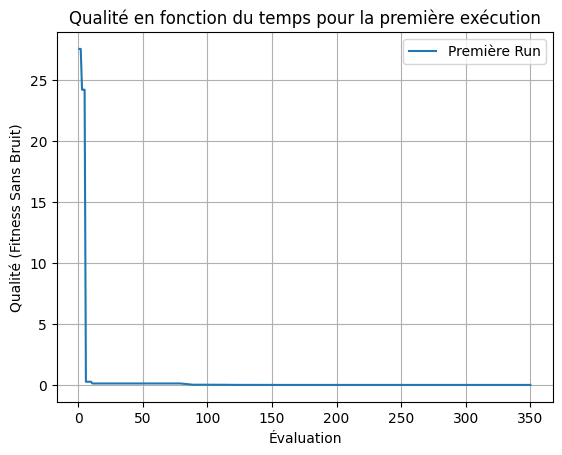

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def lire_donnees_premiere_execution(fichier):
    """
    Lit les données de la première exécution d'un fichier donné.
    :param fichier: Chemin vers le fichier contenant les données.
    :return: Générateur de DataFrame pour la première exécution.
    """
    with open(fichier, 'r') as f:
        lignes = f.readlines()
    
    donnees = []
    en_cours = False
    colonnes = []
    premiere_execution = True  # Indicateur pour extraire uniquement la première exécution
    
    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('%'):
            # Si nous sommes déjà dans un bloc de données et rencontrons un nouveau bloc,
            # cela signifie que nous avons terminé la lecture de la première exécution.
            if en_cours:
                if premiere_execution:
                    df = pd.DataFrame(donnees, columns=colonnes)
                    yield df
                    premiere_execution = False  # Arrêter après la première exécution
                donnees = []
            
            # Initialiser les colonnes pour le nouveau bloc de données
            colonnes = ['evaluation', 'fitness_sans_bruit', 'fitness_sans_bruit_meilleure', 
                        'fitness_mesuree', 'fitness_mesuree_meilleure', 'x1', 'x2']
            en_cours = True
        elif en_cours and ligne:
            # Ajouter les valeurs de la ligne actuelle aux données
            valeurs = ligne.split()
            donnees.append(valeurs)
    
    # Si nous n'avons pas encore généré de DataFrame pour la première exécution,
    # le faire maintenant avec les données restantes
    if donnees and premiere_execution:
        df = pd.DataFrame(donnees, columns=colonnes)
        yield df

# Chemin vers le fichier de données (à adapter selon votre configuration)
fichier = 'C:/Users/admin/Downloads/JADE_posik_noiseless/JADE/data_f1/bbobexp_f1_DIM2.tdat'

# Boucle pour extraire et tracer les données de la première exécution
for df_exec in lire_donnees_premiere_execution(fichier):
    # Convertir les colonnes pertinentes en type numérique
    df_exec['evaluation'] = pd.to_numeric(df_exec['evaluation'])
    df_exec['fitness_sans_bruit_meilleure'] = pd.to_numeric(df_exec['fitness_sans_bruit_meilleure'])
    
    # Tracer les données
    plt.plot(df_exec['evaluation'], df_exec['fitness_sans_bruit_meilleure'], label='Première Run')

# Configuration du graphique
plt.xlabel('Évaluation')
plt.ylabel('Qualité (Fitness Sans Bruit)')
plt.title('Qualité en fonction du temps pour la première exécution')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

# Visualisation des performances de toutes les exécutions sur la fonction F2 avec JADE

Le code suivant permet de lire les données d’optimisation à partir d’un fichier `.tdat` correspondant à la fonction `F2`, et de tracer les courbes de performance (fitness sans bruit) pour **toutes les exécutions** de l’algorithme JADE.

**NB** : il faut adapter le chemin du fichier (`fichier`) à votre environnement local.
```python
# Chemin vers le fichier de données (à adapter selon votre configuration)
fichier = 'C:/Users/admin/Downloads/JADE_posik_noiseless/JADE/data_f1/bbobexp_f1_DIM2.tdat'
```

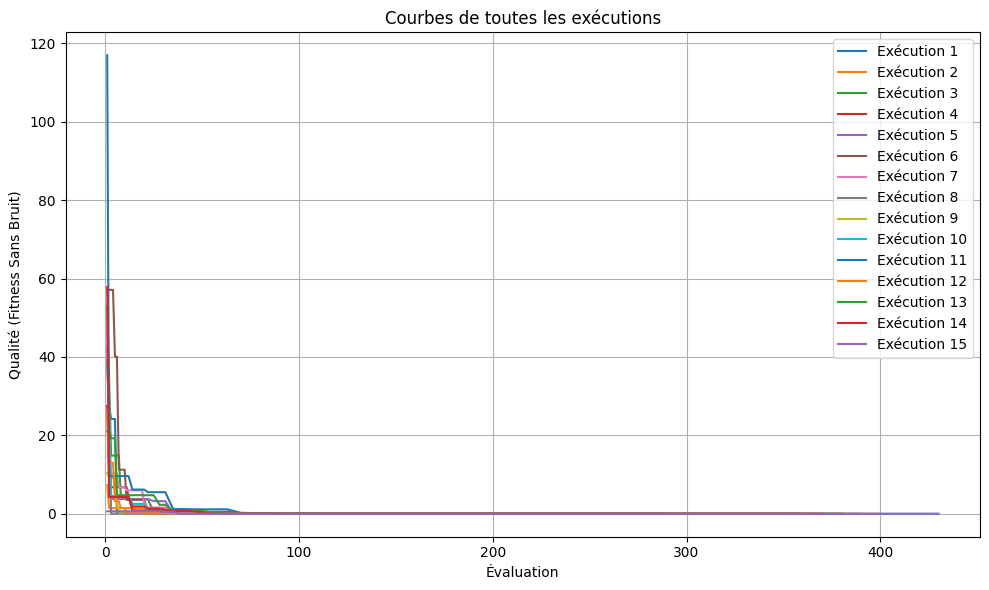

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def lire_donnees(fichier):
    """
    Lit toutes les données d'exécution d'un fichier donné.
    :param fichier: Chemin vers le fichier contenant les données.
    :return: Générateur de DataFrame pour chaque exécution trouvée.
    """
    with open(fichier, 'r') as f:
        lignes = f.readlines()
    
    donnees = []
    en_cours = False
    colonnes = []
    
    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('%'):
            # Si nous sommes déjà dans un bloc de données et rencontrons un nouveau bloc,
            # nous créons un DataFrame avec les données collectées et le générons
            if en_cours:
                df = pd.DataFrame(donnees, columns=colonnes)
                yield df
                donnees = []
            
            # Initialiser les colonnes pour le nouveau bloc de données
            colonnes = ['evaluation', 'fitness_sans_bruit', 'fitness_sans_bruit_meilleure', 
                        'fitness_mesuree', 'fitness_mesuree_meilleure', 'x1', 'x2']
            en_cours = True
        elif en_cours and ligne:
            # Ajouter les valeurs de la ligne actuelle aux données
            valeurs = ligne.split()
            donnees.append(valeurs)
    
    # Traiter le dernier bloc de données s'il existe
    if donnees:
        df = pd.DataFrame(donnees, columns=colonnes)
        yield df

# Chemin vers le fichier de données
fichier = 'C:/Users/admin/Downloads/JADE_posik_noiseless/JADE/data_f1/bbobexp_f1_DIM2.tdat'

# Créer une figure de taille appropriée
plt.figure(figsize=(10, 6))

# Variable pour compter le nombre d'exécutions
execution_count = 0

# Boucle pour extraire et tracer les données de chaque exécution
for df_exec in lire_donnees(fichier):
    # Convertir les colonnes pertinentes en type numérique
    df_exec['evaluation'] = pd.to_numeric(df_exec['evaluation'])
    df_exec['fitness_sans_bruit_meilleure'] = pd.to_numeric(df_exec['fitness_sans_bruit_meilleure'])
    
    # Tracer les données avec une étiquette unique pour chaque exécution
    plt.plot(df_exec['evaluation'], df_exec['fitness_sans_bruit_meilleure'], 
             label=f'Exécution {execution_count + 1}')
    execution_count += 1

# Configuration du graphique
plt.xlabel('Évaluation')
plt.ylabel('Qualité (Fitness Sans Bruit)')
plt.title('Courbes de toutes les exécutions')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Afficher le graphique
plt.show()

# Visualisation des Performances de Synthèse avec Moyenne et Écart-Type

Le code suivant permet de générer une courbe de synthèse qui représente la **moyenne** des performances de l'algorithme JADE pour la fonction de test `F1`, ainsi que l'**écart-type** autour de cette moyenne. Cela donne une vue d'ensemble de la performance de l'algorithme au fil des évaluations.

**NB** : il faut adapter le chemin du fichier (`fichier`) à votre environnement local.
```python
# Chemin vers le fichier de données (à adapter selon votre configuration)
fichier = 'C:/Users/admin/Downloads/JADE_posik_noiseless/JADE/data_f1/bbobexp_f1_DIM2.tdat'
```

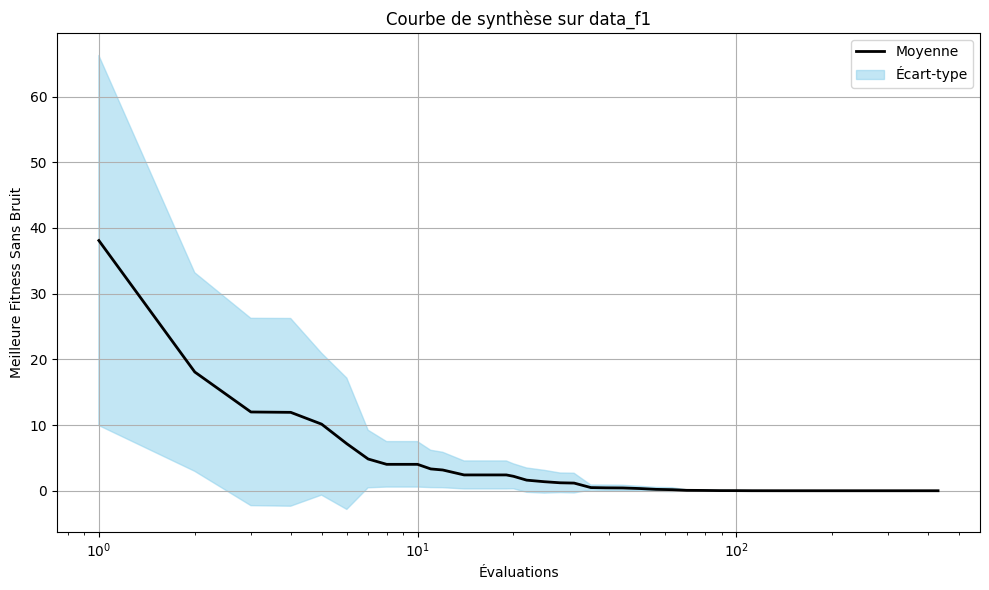

In [5]:
# code pour courbe de synthese
import pandas as pd
import matplotlib.pyplot as plt

def lire_tous_les_runs(fichier):
    """Lit tous les runs d'un fichier et les stocke sous forme de DataFrames."""
    with open(fichier, 'r') as f:
        lignes = f.readlines()
    
    runs = []
    en_cours = False
    donnees = []
    colonnes = []

    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('%'):
            if en_cours:
                runs.append(pd.DataFrame(donnees, columns=colonnes))
                donnees = []
            colonnes = ['evaluation', 'fitness_sans_bruit', 'fitness_sans_bruit_meilleure',
                        'fitness_mesuree', 'fitness_mesuree_meilleure', 'x1', 'x2']
            en_cours = True
        elif en_cours and ligne:
            valeurs = ligne.split()
            if len(valeurs) >= 7:
                donnees.append(valeurs[:7])

    if donnees:
        runs.append(pd.DataFrame(donnees, columns=colonnes))

    return runs

# Chemin du dossier spécifique
fichier = 'C:/Users/admin/Downloads/JADE_posik_noiseless/JADE/data_f1/bbobexp_f1_DIM2.tdat'

# Lire tous les runs pour ce fichier
runs = lire_tous_les_runs(fichier)

if len(runs) < 1:
    print(f"Erreur : Aucun run trouvé dans data_f1 !")
else:
    # Convertir les colonnes nécessaires en valeurs numériques
    for run in runs:
        run['evaluation'] = pd.to_numeric(run['evaluation'])
        run['fitness_sans_bruit_meilleure'] = pd.to_numeric(run['fitness_sans_bruit_meilleure'])

    # Fusionner les runs et calculer la moyenne et l'écart-type
    merged = pd.concat(runs, axis=0).groupby('evaluation')['fitness_sans_bruit_meilleure']
    mean_fitness = merged.mean()
    std_fitness = merged.std()

    # Tracer le graphique
    plt.figure(figsize=(10, 6))
    plt.plot(mean_fitness.index, mean_fitness.values, color='black', linewidth=2, label='Moyenne')
    plt.fill_between(mean_fitness.index, mean_fitness.values - std_fitness, 
                     mean_fitness.values + std_fitness, color='#87CEEB', alpha=0.5, label='Écart-type')
    plt.title('Courbe de synthèse sur data_f1')
    plt.xlabel('Évaluations')
    plt.xscale("log")  
    plt.ylabel('Meilleure Fitness Sans Bruit')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Visualisation des Performances de Synthèse avec Moyenne et Écart-Type pour Plusieurs Exécutions

Le code suivant permet de générer une série de courbes de synthèse représentant la **moyenne** et l'**écart-type** des performances de l'algorithme JADE pour plusieurs fonctions de test (`F1` à `F20`). Chaque graphique montre l'évolution de la **fitness sans bruit** au fil des évaluations pour plusieurs exécutions, et met en évidence l'écart-type autour de la moyenne.

**NB** : il faut adapter le chemin du fichier (`fichier`) à votre environnement local.
```python
# Chemin vers le fichier de données (à adapter selon votre configuration)
chemin_fichier = f'C:/Users/admin/Downloads/JADE_posik_noiseless/JADE/data_{data_name}/bbobexp_{data_name}_DIM2.tdat'
```


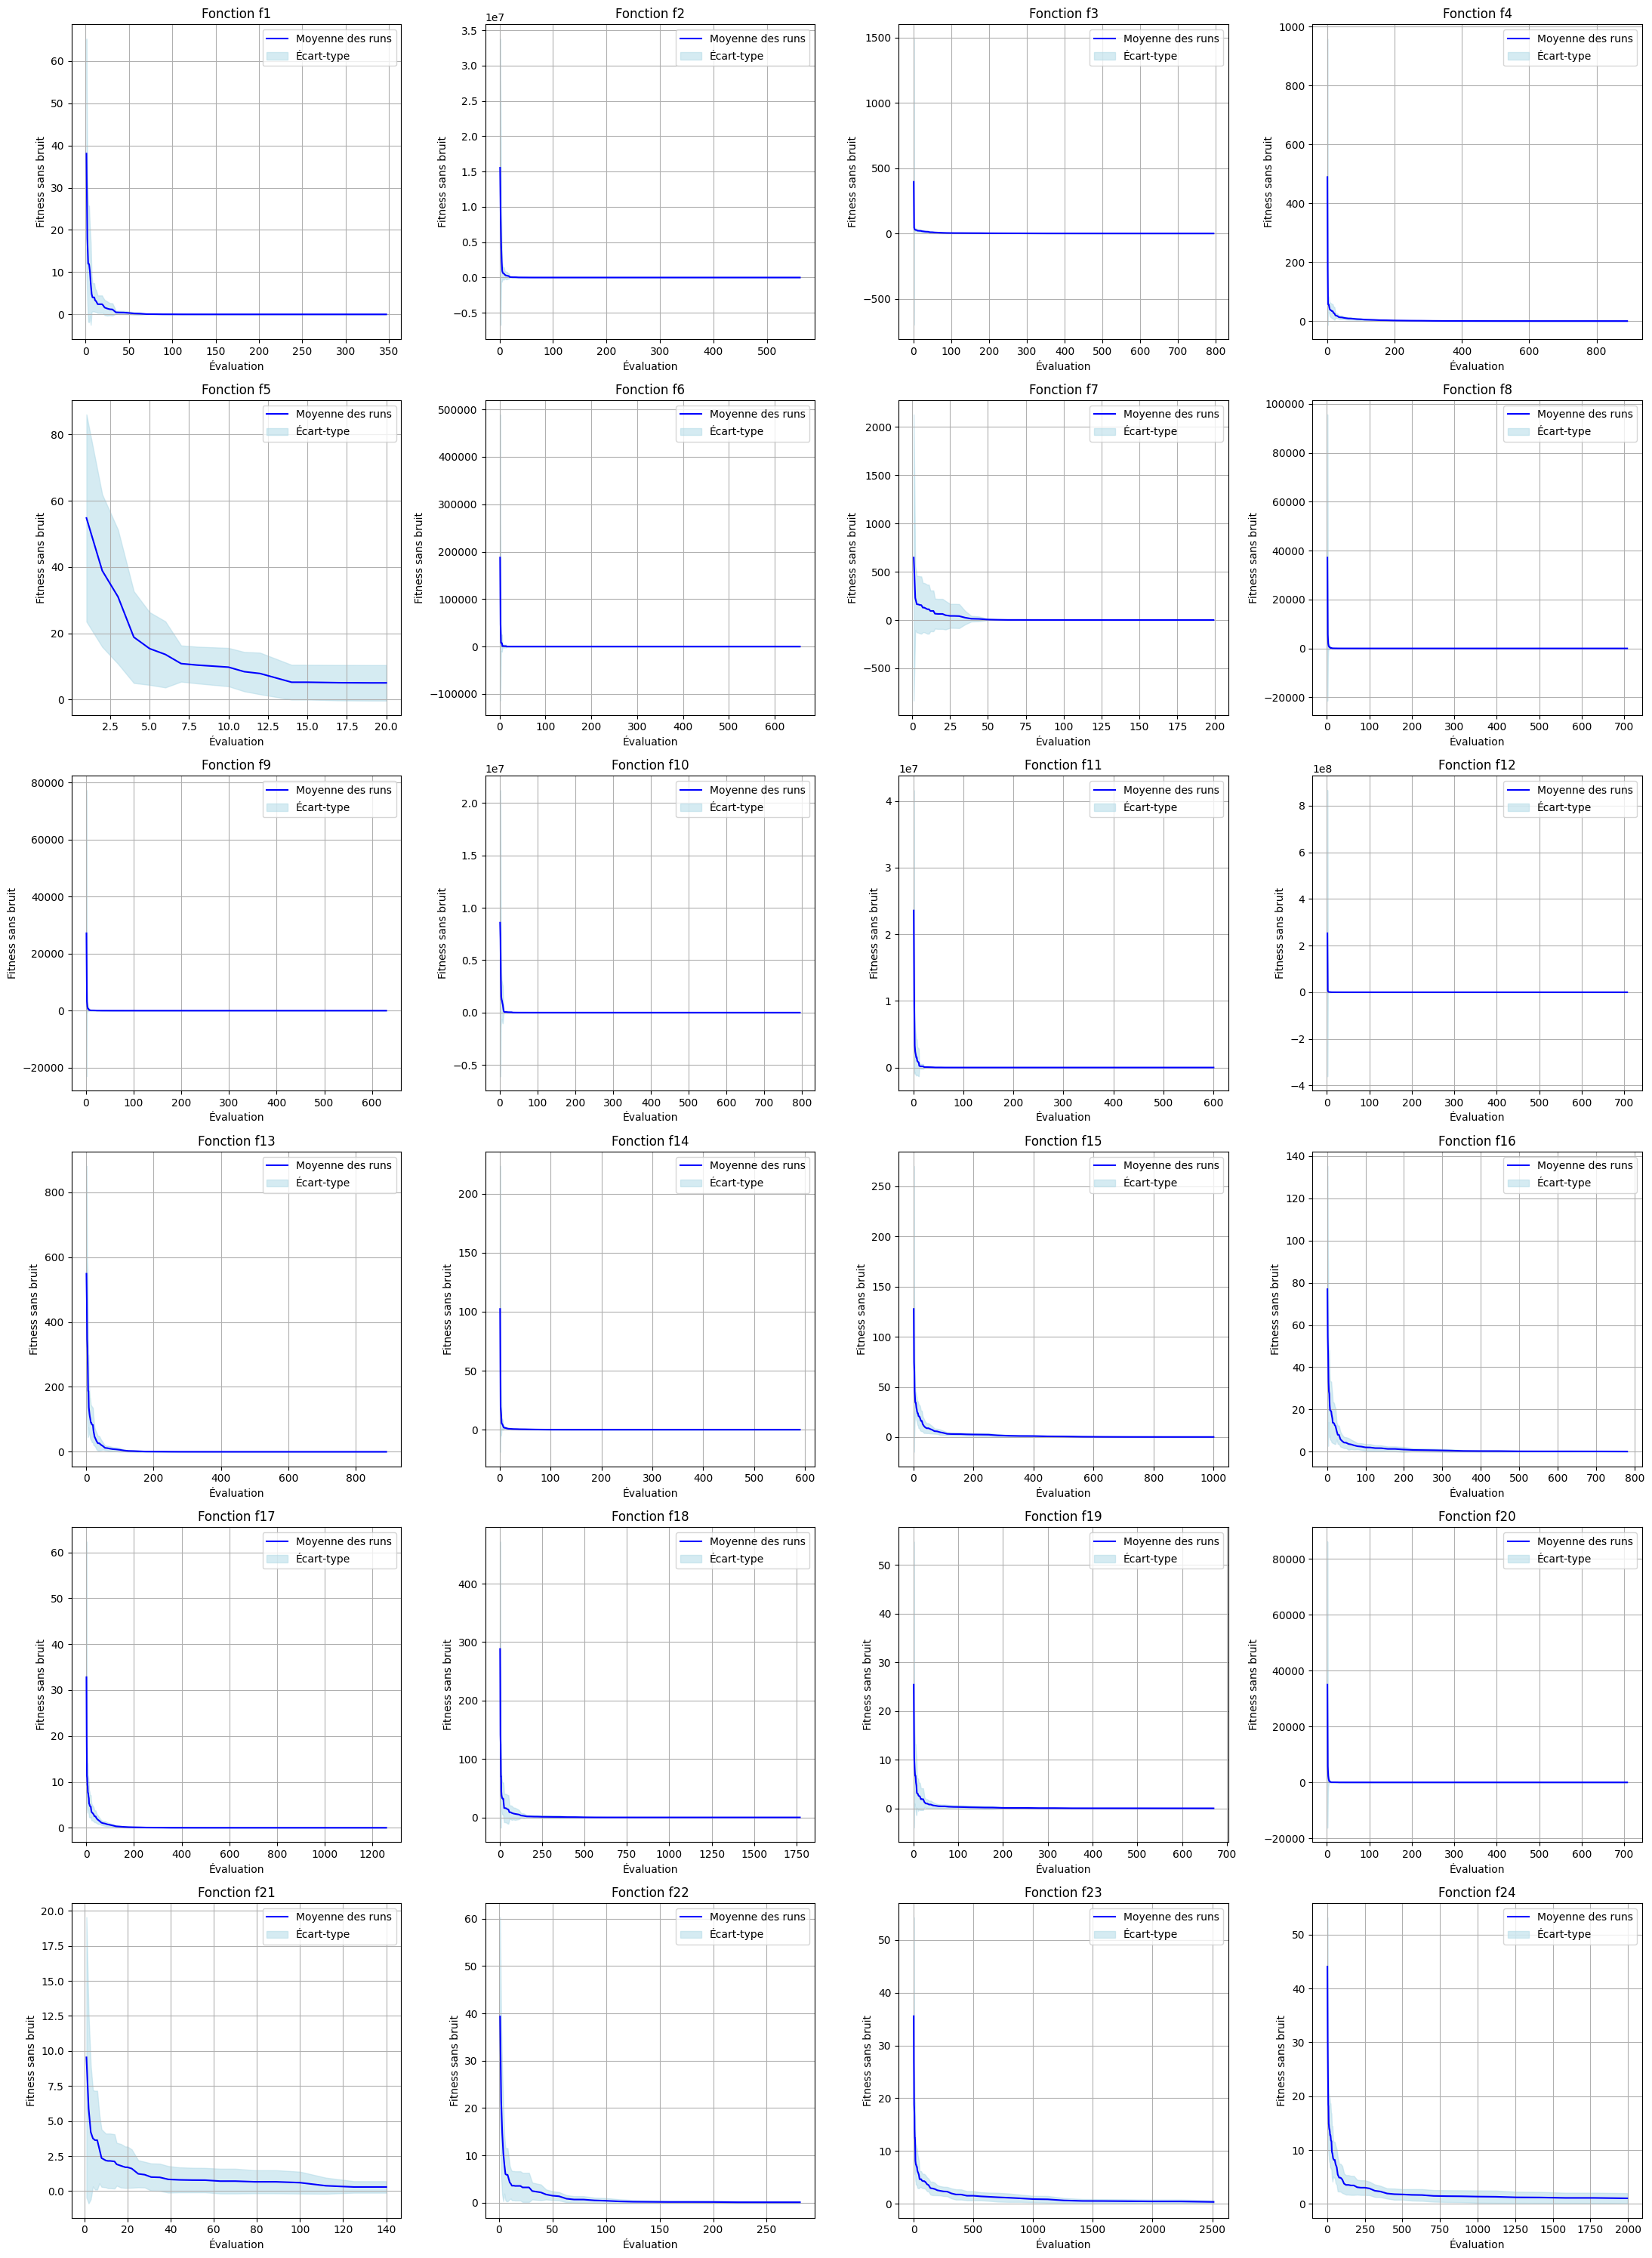

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def lire_donnees(fichier):
    """
    Lit toutes les données d'exécution d'un fichier donné.
    :param fichier: Chemin vers le fichier contenant les données.
    :return: Générateur de DataFrame pour chaque exécution trouvée.
    """
    with open(fichier, 'r') as f:
        lignes = f.readlines()
    
    donnees = []
    en_cours = False
    colonnes = []
    
    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('%'):
            if en_cours:
                df = pd.DataFrame(donnees, columns=colonnes)
                yield df
                donnees = []
            colonnes = ['evaluation', 'fitness_sans_bruit', 'fitness_sans_bruit_meilleure', 
                        'fitness_mesuree', 'fitness_mesuree_meilleure', 'x1', 'x2']
            en_cours = True
        elif en_cours and ligne:
            valeurs = ligne.split()
            donnees.append(valeurs)
    
    if donnees:
        df = pd.DataFrame(donnees, columns=colonnes)
        yield df

# Liste complète des fonctions de f1 à f24
fichiers = [f'f{i}' for i in range(1, 25)]

# Création de la figure
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(22, 30))
axes = axes.flatten()

# Boucle sur chaque fonction
for idx, data_name in enumerate(fichiers):
    chemin_fichier = f'C:/Users/admin/Downloads/JADE_posik_noiseless/JADE/data_{data_name}/bbobexp_{data_name}_DIM2.tdat'
    
    try:
        executions = list(lire_donnees(chemin_fichier))
        moyennes = None
        ecart_types = None
        
        for df_exec in executions:
            df_exec['evaluation'] = pd.to_numeric(df_exec['evaluation'])
            df_exec['fitness_sans_bruit_meilleure'] = pd.to_numeric(df_exec['fitness_sans_bruit_meilleure'])
            
            if moyennes is None:
                moyennes = df_exec[['evaluation', 'fitness_sans_bruit_meilleure']].copy()
                moyennes['fitness_sans_bruit_meilleure'] = moyennes['fitness_sans_bruit_meilleure'].astype(float)
                ecart_types = df_exec[['evaluation', 'fitness_sans_bruit_meilleure']].copy()
                ecart_types['fitness_sans_bruit_meilleure'] = ecart_types['fitness_sans_bruit_meilleure'].astype(float) ** 2
            else:
                moyennes['fitness_sans_bruit_meilleure'] += df_exec['fitness_sans_bruit_meilleure'].astype(float)
                ecart_types['fitness_sans_bruit_meilleure'] += df_exec['fitness_sans_bruit_meilleure'].astype(float) ** 2
        
        moyennes['fitness_sans_bruit_meilleure'] /= len(executions)
        ecart_types['fitness_sans_bruit_meilleure'] = np.sqrt(
            (ecart_types['fitness_sans_bruit_meilleure'] / len(executions)) - 
            (moyennes['fitness_sans_bruit_meilleure'] ** 2)
        )
        
        axes[idx].plot(moyennes['evaluation'], moyennes['fitness_sans_bruit_meilleure'], 
                       label='Moyenne des runs', color='blue')
        axes[idx].fill_between(
            moyennes['evaluation'],
            moyennes['fitness_sans_bruit_meilleure'] - ecart_types['fitness_sans_bruit_meilleure'],
            moyennes['fitness_sans_bruit_meilleure'] + ecart_types['fitness_sans_bruit_meilleure'],
            color='lightblue', alpha=0.5, label='Écart-type'
        )
        axes[idx].set_title(f'Fonction {data_name}')
        axes[idx].set_xlabel('Évaluation')
        axes[idx].set_ylabel('Fitness sans bruit')
        axes[idx].legend()
        axes[idx].grid(True)

    except FileNotFoundError:
        axes[idx].set_title(f'{data_name} - Fichier manquant')
        axes[idx].axis('off')
    except Exception as e:
        axes[idx].set_title(f'{data_name} - Erreur')
        axes[idx].axis('off')
        print(f"Erreur dans le traitement de {data_name} : {e}")

# Supprimer les axes inutilisés
for i in range(len(fichiers), len(axes)):
    fig.delaxes(axes[i])

# Mise en page finale
plt.tight_layout()
plt.show()


# Visualisation des Performances de l'Algorithme JADE avec Moyenne et Écart-Type

Le code ci-dessous permet de générer des courbes de synthèse représentant la moyenne des performances de l'algorithme **JADE** sur plusieurs jeux de données, ainsi que l'écart-type autour de cette moyenne. Ces courbes permettent d'analyser les performances de l'algorithme sur différentes **fonctions de test**, avec deux dimensions spécifiées (5 et 20). L'évaluation est présentée sur une **échelle logarithmique**.

### Fonctions de test utilisées :
Les fonctions de test avec lesquelles l'algorithme JADE a été évalué sont les suivantes :
- **f1**
- **f6**
- **f10**
- **f15**
- **f20**

Chaque graphique montre la variation de la **qualité** (fitness sans bruit) de l'algorithme au fil des **évaluations**, en prenant en compte plusieurs exécutions de l'algorithme.

**NB** : N'oubliez pas d'adapter le chemin du fichier (`fichier`) à votre environnement local pour charger correctement les données.

```python
# Chemin vers le fichier de données (à adapter selon votre configuration)
chemin_fichier = f'C:/Users/admin/Downloads/JADE_posik_noiseless/JADE/data_{data_name}/bbobexp_{data_name}_DIM{dim}.tdat'
```
 

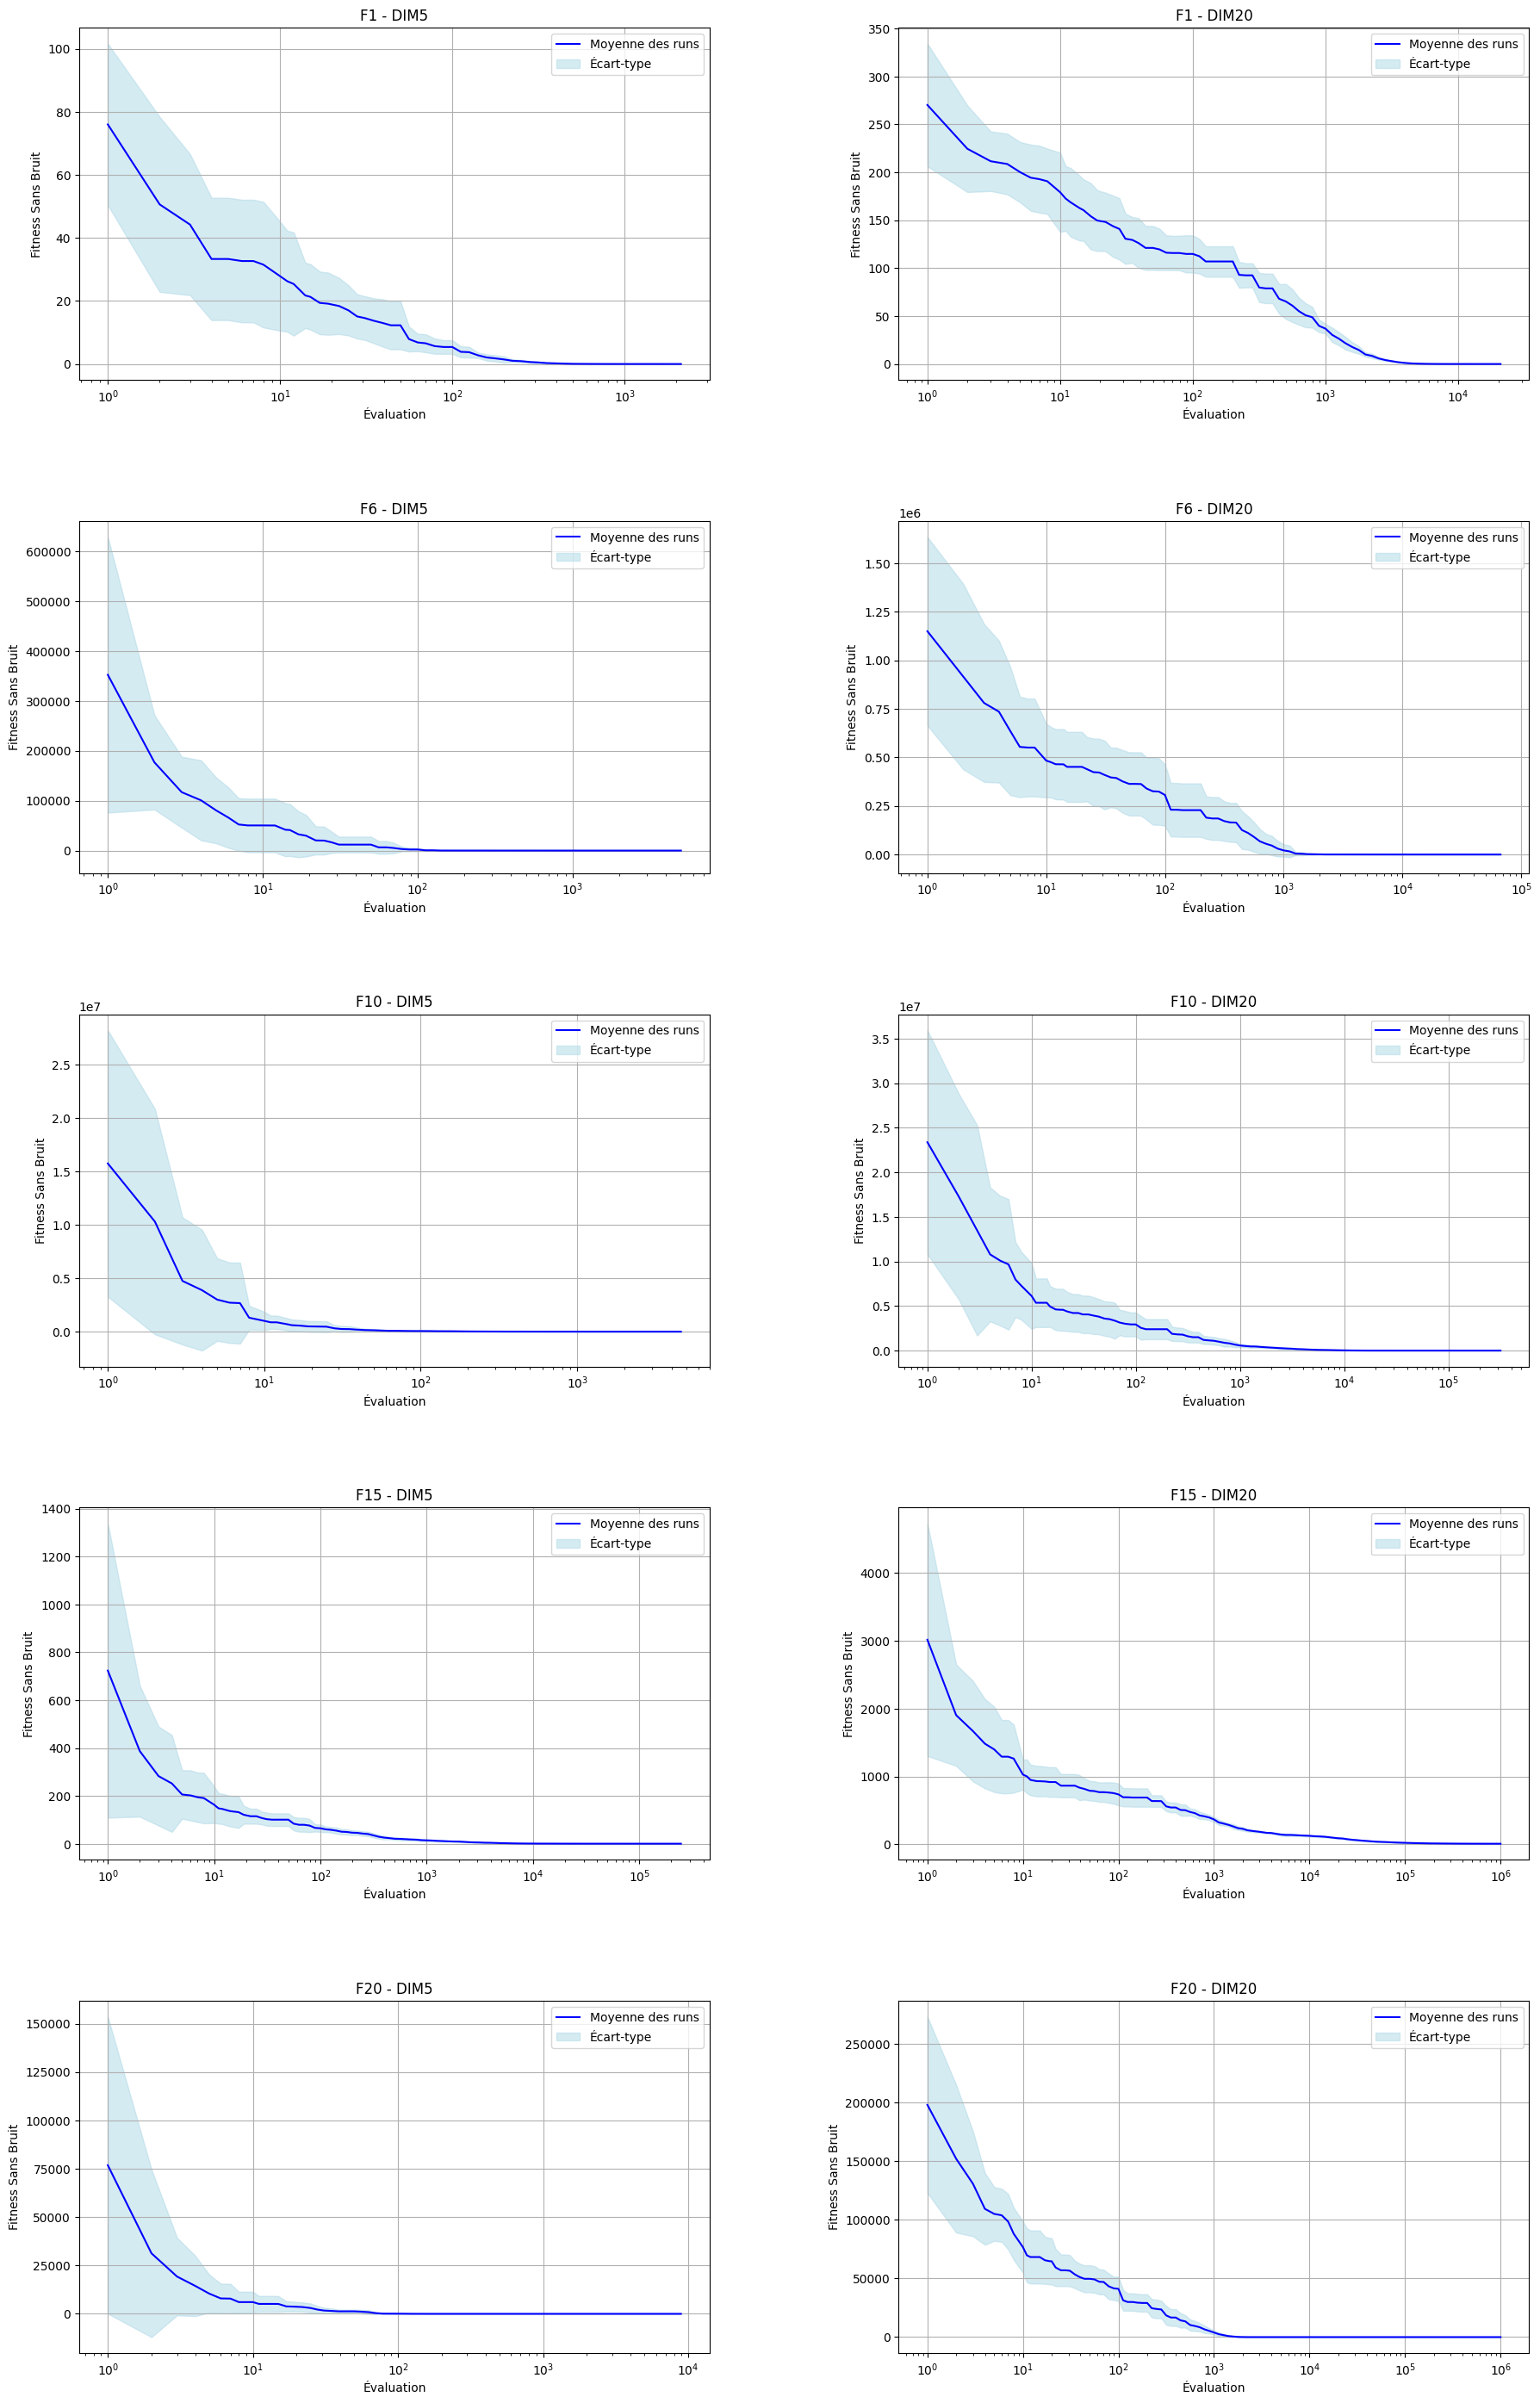

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def lire_donnees(fichier):
    with open(fichier, 'r') as f:
        lignes = f.readlines()
    
    donnees = []
    en_cours = False
    colonnes = ['evaluation', 'fitness_sans_bruit', 'fitness_sans_bruit_meilleure']
    
    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('%'):
            if en_cours:
                df = pd.DataFrame(donnees, columns=colonnes)
                yield df
                donnees = []
            en_cours = True
        elif en_cours and ligne:
            valeurs = ligne.split()
            valeurs = valeurs[:3]
            donnees.append(valeurs)
    
    if donnees:
        df = pd.DataFrame(donnees, columns=colonnes)
        yield df

# Fonctions et dimensions à tracer
fichiers = ['f1', 'f6', 'f10', 'f15', 'f20']
dimensions = [5, 20]

# Créer une figure assez grande pour tout afficher sans scroller
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 30))  # Taille adaptée
axes = axes.flatten()

for idx, data_name in enumerate(fichiers):
    for dim_idx, dim in enumerate(dimensions):
        chemin_fichier = f'C:/Users/admin/Downloads/JADE_posik_noiseless/JADE/data_{data_name}/bbobexp_{data_name}_DIM{dim}.tdat'
        
        executions = list(lire_donnees(chemin_fichier))
        moyennes = None
        ecart_types = None

        for df_exec in executions:
            df_exec['evaluation'] = pd.to_numeric(df_exec['evaluation'])
            df_exec['fitness_sans_bruit_meilleure'] = pd.to_numeric(df_exec['fitness_sans_bruit_meilleure'])

            if moyennes is None:
                moyennes = df_exec[['evaluation', 'fitness_sans_bruit_meilleure']].copy()
                ecart_types = df_exec[['evaluation', 'fitness_sans_bruit_meilleure']].copy()
                moyennes['fitness_sans_bruit_meilleure'] = moyennes['fitness_sans_bruit_meilleure'].astype(float)
                ecart_types['fitness_sans_bruit_meilleure'] = ecart_types['fitness_sans_bruit_meilleure'].astype(float) ** 2
            else:
                moyennes['fitness_sans_bruit_meilleure'] += df_exec['fitness_sans_bruit_meilleure'].astype(float)
                ecart_types['fitness_sans_bruit_meilleure'] += df_exec['fitness_sans_bruit_meilleure'].astype(float) ** 2

        moyennes['fitness_sans_bruit_meilleure'] /= len(executions)
        ecart_types['fitness_sans_bruit_meilleure'] = np.sqrt(
            (ecart_types['fitness_sans_bruit_meilleure'] / len(executions)) - (moyennes['fitness_sans_bruit_meilleure'] ** 2)
        )

        ax_idx = idx * len(dimensions) + dim_idx

        axes[ax_idx].plot(moyennes['evaluation'], moyennes['fitness_sans_bruit_meilleure'], label='Moyenne des runs', color='blue')
        axes[ax_idx].fill_between(
            moyennes['evaluation'],
            moyennes['fitness_sans_bruit_meilleure'] - ecart_types['fitness_sans_bruit_meilleure'],
            moyennes['fitness_sans_bruit_meilleure'] + ecart_types['fitness_sans_bruit_meilleure'],
            color='lightblue', alpha=0.5, label='Écart-type'
        )
        axes[ax_idx].set_xlabel('Évaluation')
        axes[ax_idx].set_ylabel('Fitness Sans Bruit')
        axes[ax_idx].set_title(f'{data_name.upper()} - DIM{dim}')
        axes[ax_idx].grid(True)
        axes[ax_idx].legend()
        axes[ax_idx].set_xscale('log')

plt.tight_layout()

# Pour afficher tout sans scroll (notamment en notebook)
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4, wspace=0.3)

plt.show()


# Visualisation des Performances de l'Algorithme Random Search avec Moyenne et Écart-Type

Le code ci-dessous génère des courbes représentant la moyenne des performances de l'algorithme **Random Search** sur plusieurs jeux de données, ainsi que l'écart-type autour de cette moyenne. Les courbes permettent d'analyser les performances de l'algorithme sur différentes **fonctions de test**, avec deux dimensions spécifiées (5 et 20). L'évaluation est présentée sur une **échelle logarithmique**.

### Fonctions de test utilisées :
Les fonctions de test avec lesquelles l'algorithme Random Search a été évalué sont les suivantes :
- **f1**
- **f6**
- **f10**
- **f15**
- **f20**

Chaque graphique montre la variation de la **qualité** (fitness sans bruit) de l'algorithme au fil des **évaluations**, en prenant en compte plusieurs exécutions de l'algorithme.

**NB** : N'oubliez pas d'adapter le chemin du fichier (`fichier`) à votre environnement local pour charger correctement les données.
```python
# Chemin vers le fichier de données (à adapter selon votre configuration)
chemin_fichier = f'C:/Users/admin/Downloads/RANDOMSEARCH-5-1e7D_Brockhoff/RANDOMSEARCH-5-1e7D-Brockhoff/data_{data_name}/bbobexp_{data_name}_DIM{dim}_i1.tdat'
```

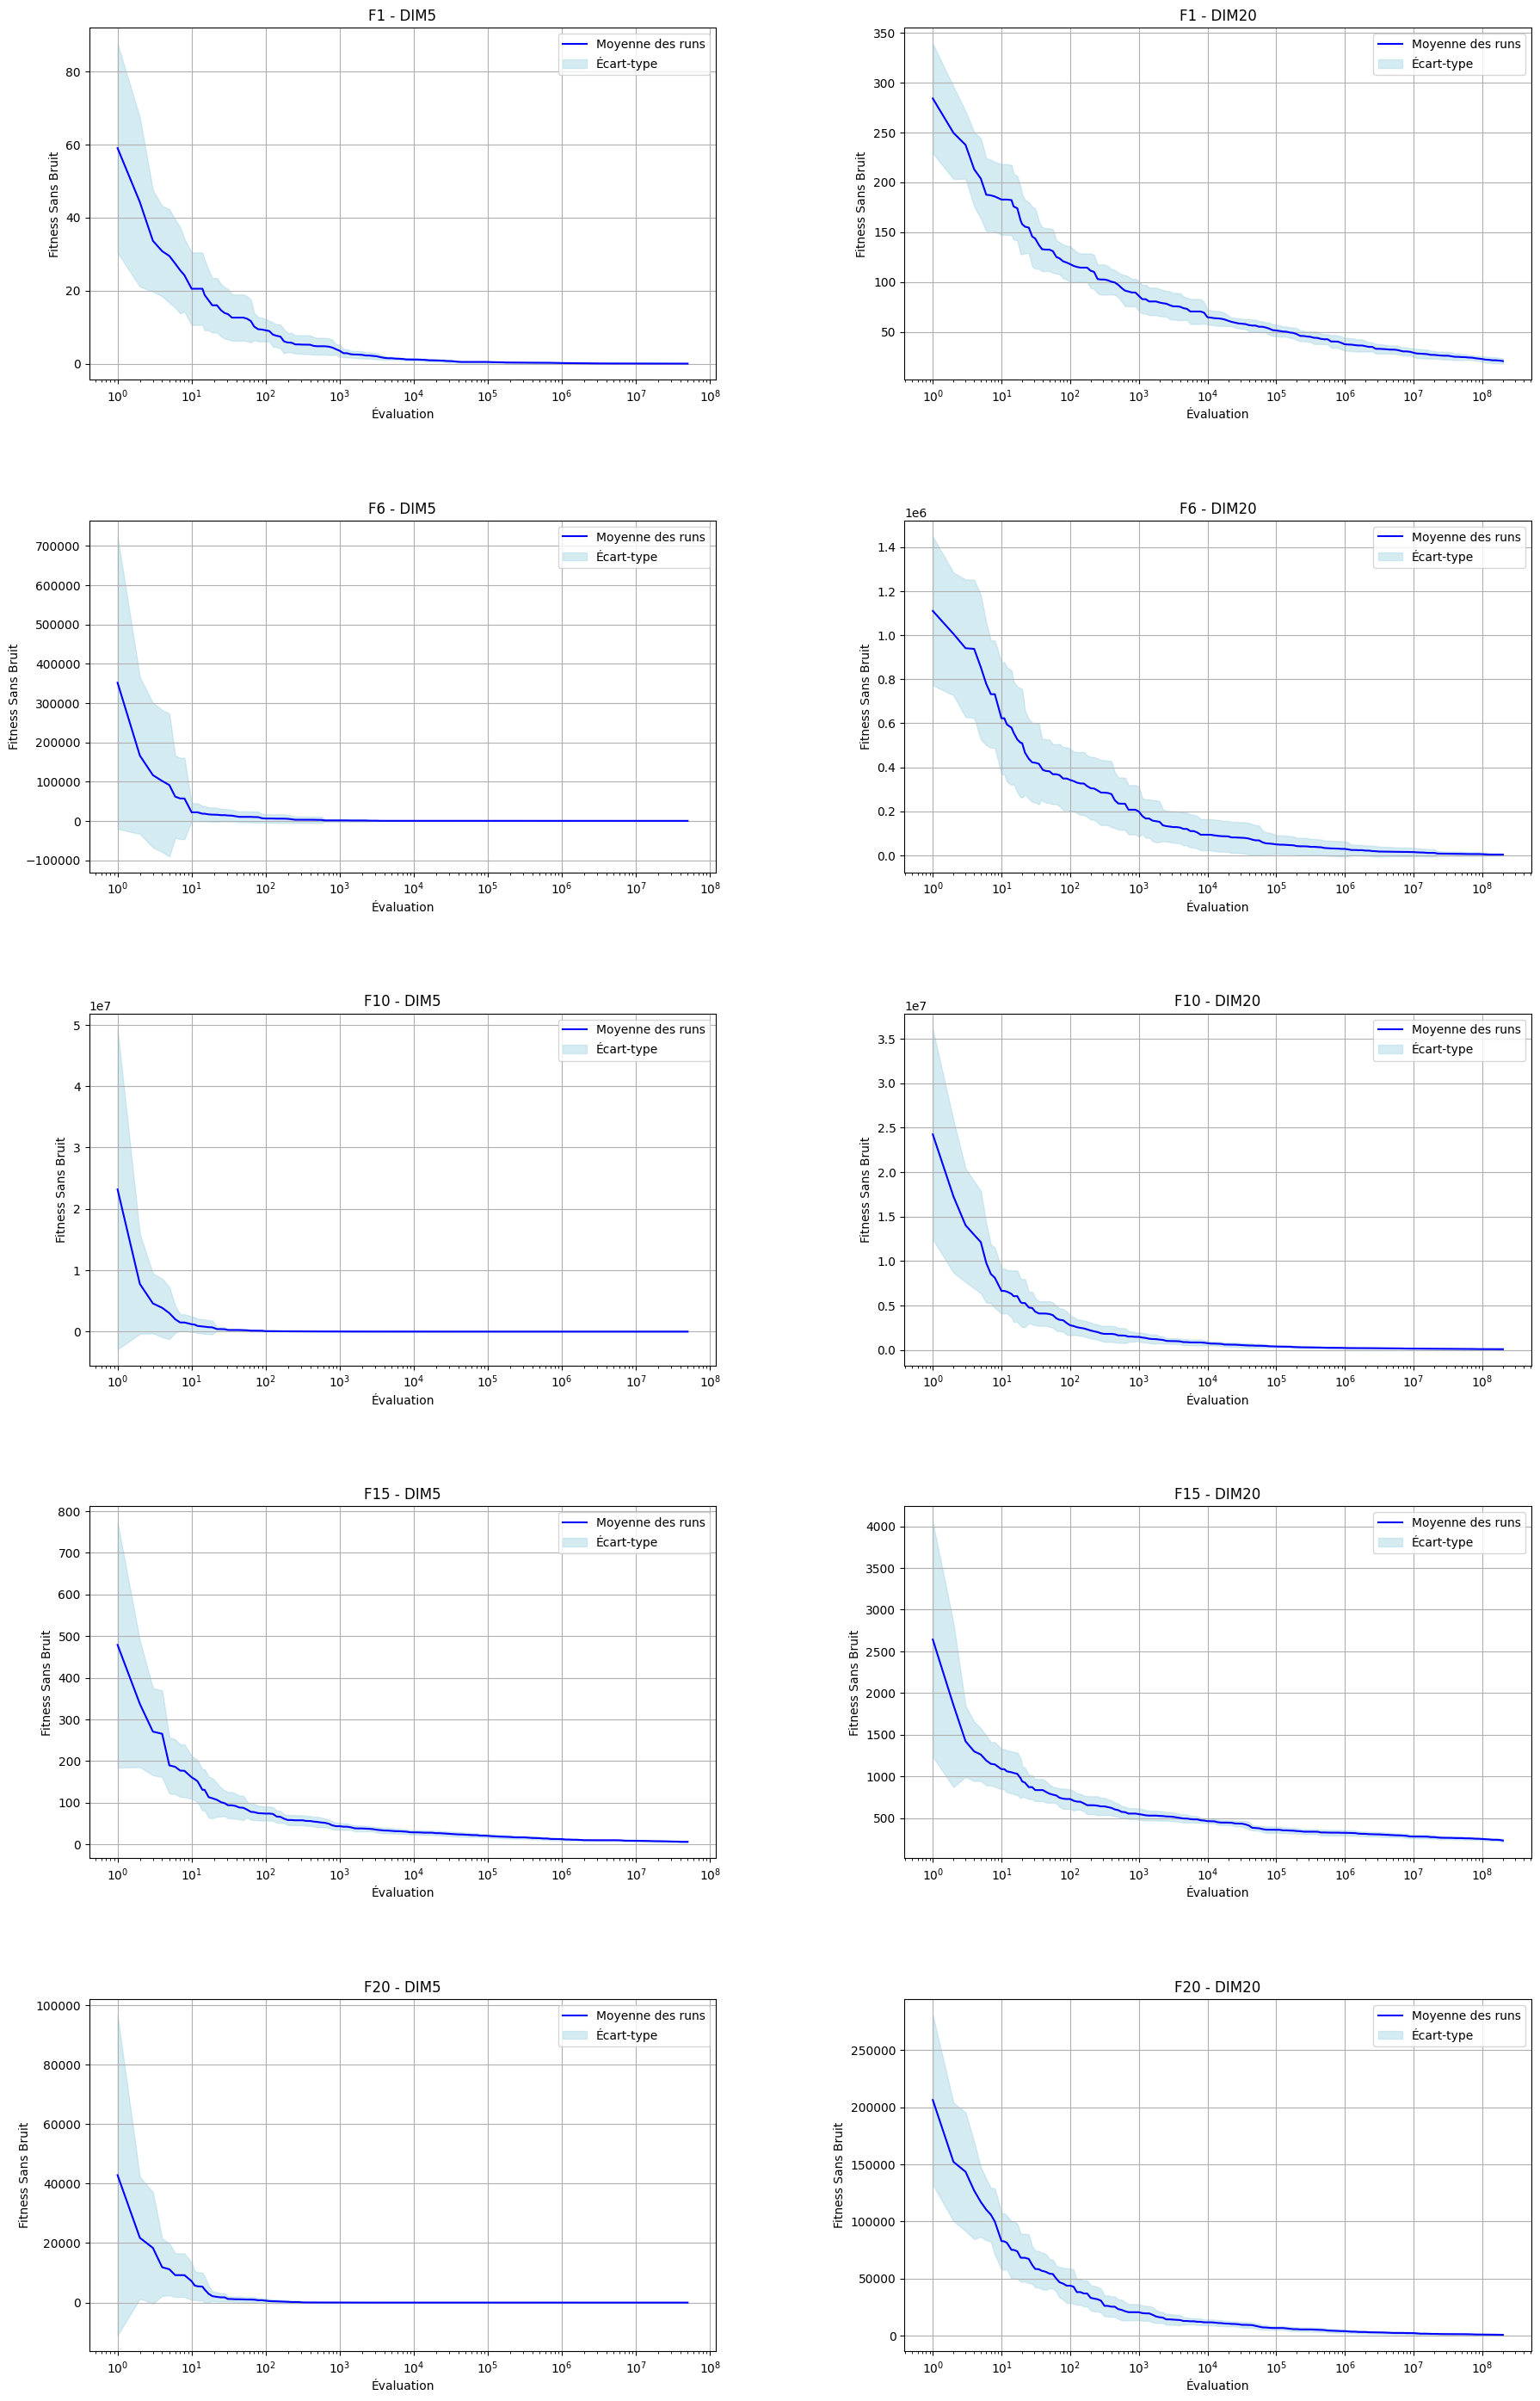

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def lire_donnees(fichier):
    with open(fichier, 'r') as f:
        lignes = f.readlines()
    
    donnees = []
    en_cours = False
    colonnes = ['evaluation', 'fitness_sans_bruit', 'fitness_sans_bruit_meilleure']
    
    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('%'):
            if en_cours:
                df = pd.DataFrame(donnees, columns=colonnes)
                yield df
                donnees = []
            en_cours = True
        elif en_cours and ligne:
            valeurs = ligne.split()
            valeurs = valeurs[:3]
            donnees.append(valeurs)
    
    if donnees:
        df = pd.DataFrame(donnees, columns=colonnes)
        yield df

# Fonctions et dimensions à tracer
fichiers = ['f1', 'f6', 'f10', 'f15', 'f20']
dimensions = [5, 20]

# Créer une figure assez grande pour tout afficher sans scroller
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 30))  # Taille adaptée
axes = axes.flatten()

for idx, data_name in enumerate(fichiers):
    for dim_idx, dim in enumerate(dimensions):
        chemin_fichier = f'C:/Users/admin/Downloads/RANDOMSEARCH-5-1e7D_Brockhoff/RANDOMSEARCH-5-1e7D-Brockhoff/data_{data_name}/bbobexp_{data_name}_DIM{dim}_i1.tdat'
        
        executions = list(lire_donnees(chemin_fichier))
        moyennes = None
        ecart_types = None

        for df_exec in executions:
            df_exec['evaluation'] = pd.to_numeric(df_exec['evaluation'])
            df_exec['fitness_sans_bruit_meilleure'] = pd.to_numeric(df_exec['fitness_sans_bruit_meilleure'])

            if moyennes is None:
                moyennes = df_exec[['evaluation', 'fitness_sans_bruit_meilleure']].copy()
                ecart_types = df_exec[['evaluation', 'fitness_sans_bruit_meilleure']].copy()
                moyennes['fitness_sans_bruit_meilleure'] = moyennes['fitness_sans_bruit_meilleure'].astype(float)
                ecart_types['fitness_sans_bruit_meilleure'] = ecart_types['fitness_sans_bruit_meilleure'].astype(float) ** 2
            else:
                moyennes['fitness_sans_bruit_meilleure'] += df_exec['fitness_sans_bruit_meilleure'].astype(float)
                ecart_types['fitness_sans_bruit_meilleure'] += df_exec['fitness_sans_bruit_meilleure'].astype(float) ** 2

        moyennes['fitness_sans_bruit_meilleure'] /= len(executions)
        ecart_types['fitness_sans_bruit_meilleure'] = np.sqrt(
            (ecart_types['fitness_sans_bruit_meilleure'] / len(executions)) - (moyennes['fitness_sans_bruit_meilleure'] ** 2)
        )

        ax_idx = idx * len(dimensions) + dim_idx

        axes[ax_idx].plot(moyennes['evaluation'], moyennes['fitness_sans_bruit_meilleure'], label='Moyenne des runs', color='blue')
        axes[ax_idx].fill_between(
            moyennes['evaluation'],
            moyennes['fitness_sans_bruit_meilleure'] - ecart_types['fitness_sans_bruit_meilleure'],
            moyennes['fitness_sans_bruit_meilleure'] + ecart_types['fitness_sans_bruit_meilleure'],
            color='lightblue', alpha=0.5, label='Écart-type'
        )
        axes[ax_idx].set_xlabel('Évaluation')
        axes[ax_idx].set_ylabel('Fitness Sans Bruit')
        axes[ax_idx].set_title(f'{data_name.upper()} - DIM{dim}')
        axes[ax_idx].grid(True)
        axes[ax_idx].legend()
        axes[ax_idx].set_xscale('log')

plt.tight_layout()

# Pour afficher tout sans scroll (notamment en notebook)
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4, wspace=0.3)

plt.show()


# Visualisation des Performances de l'Algorithme WOA avec Moyenne et Écart-Type

Le code ci-dessous génère des courbes représentant la moyenne des performances de l'algorithme **WOA (Whale Optimization Algorithm)** sur plusieurs jeux de données, ainsi que l'écart-type autour de cette moyenne. Ces courbes permettent d'analyser les performances de l'algorithme sur différentes **fonctions de test**, avec deux dimensions spécifiées (5 et 20). L'évaluation est présentée sur une **échelle logarithmique**.

### Fonctions de test utilisées :
Les fonctions de test avec lesquelles l'algorithme WOA a été évalué sont les suivantes :
- **f1**
- **f6**
- **f10**
- **f15**
- **f20**

Chaque graphique montre la variation de la **qualité** (fitness sans bruit) de l'algorithme au fil des **évaluations**, en prenant en compte plusieurs exécutions de l'algorithme.

**NB** : N'oubliez pas d'adapter le chemin du fichier (`fichier`) à votre environnement local pour charger correctement les données.
```python
# Chemin vers le fichier de données (à adapter selon votre configuration)
chemin_fichier = f'C:/Users/admin/Downloads/WOA_Espinoza/WOA/data_{data_name}/bbobexp_{data_name}_DIM{dim}_i1.tdat'
```

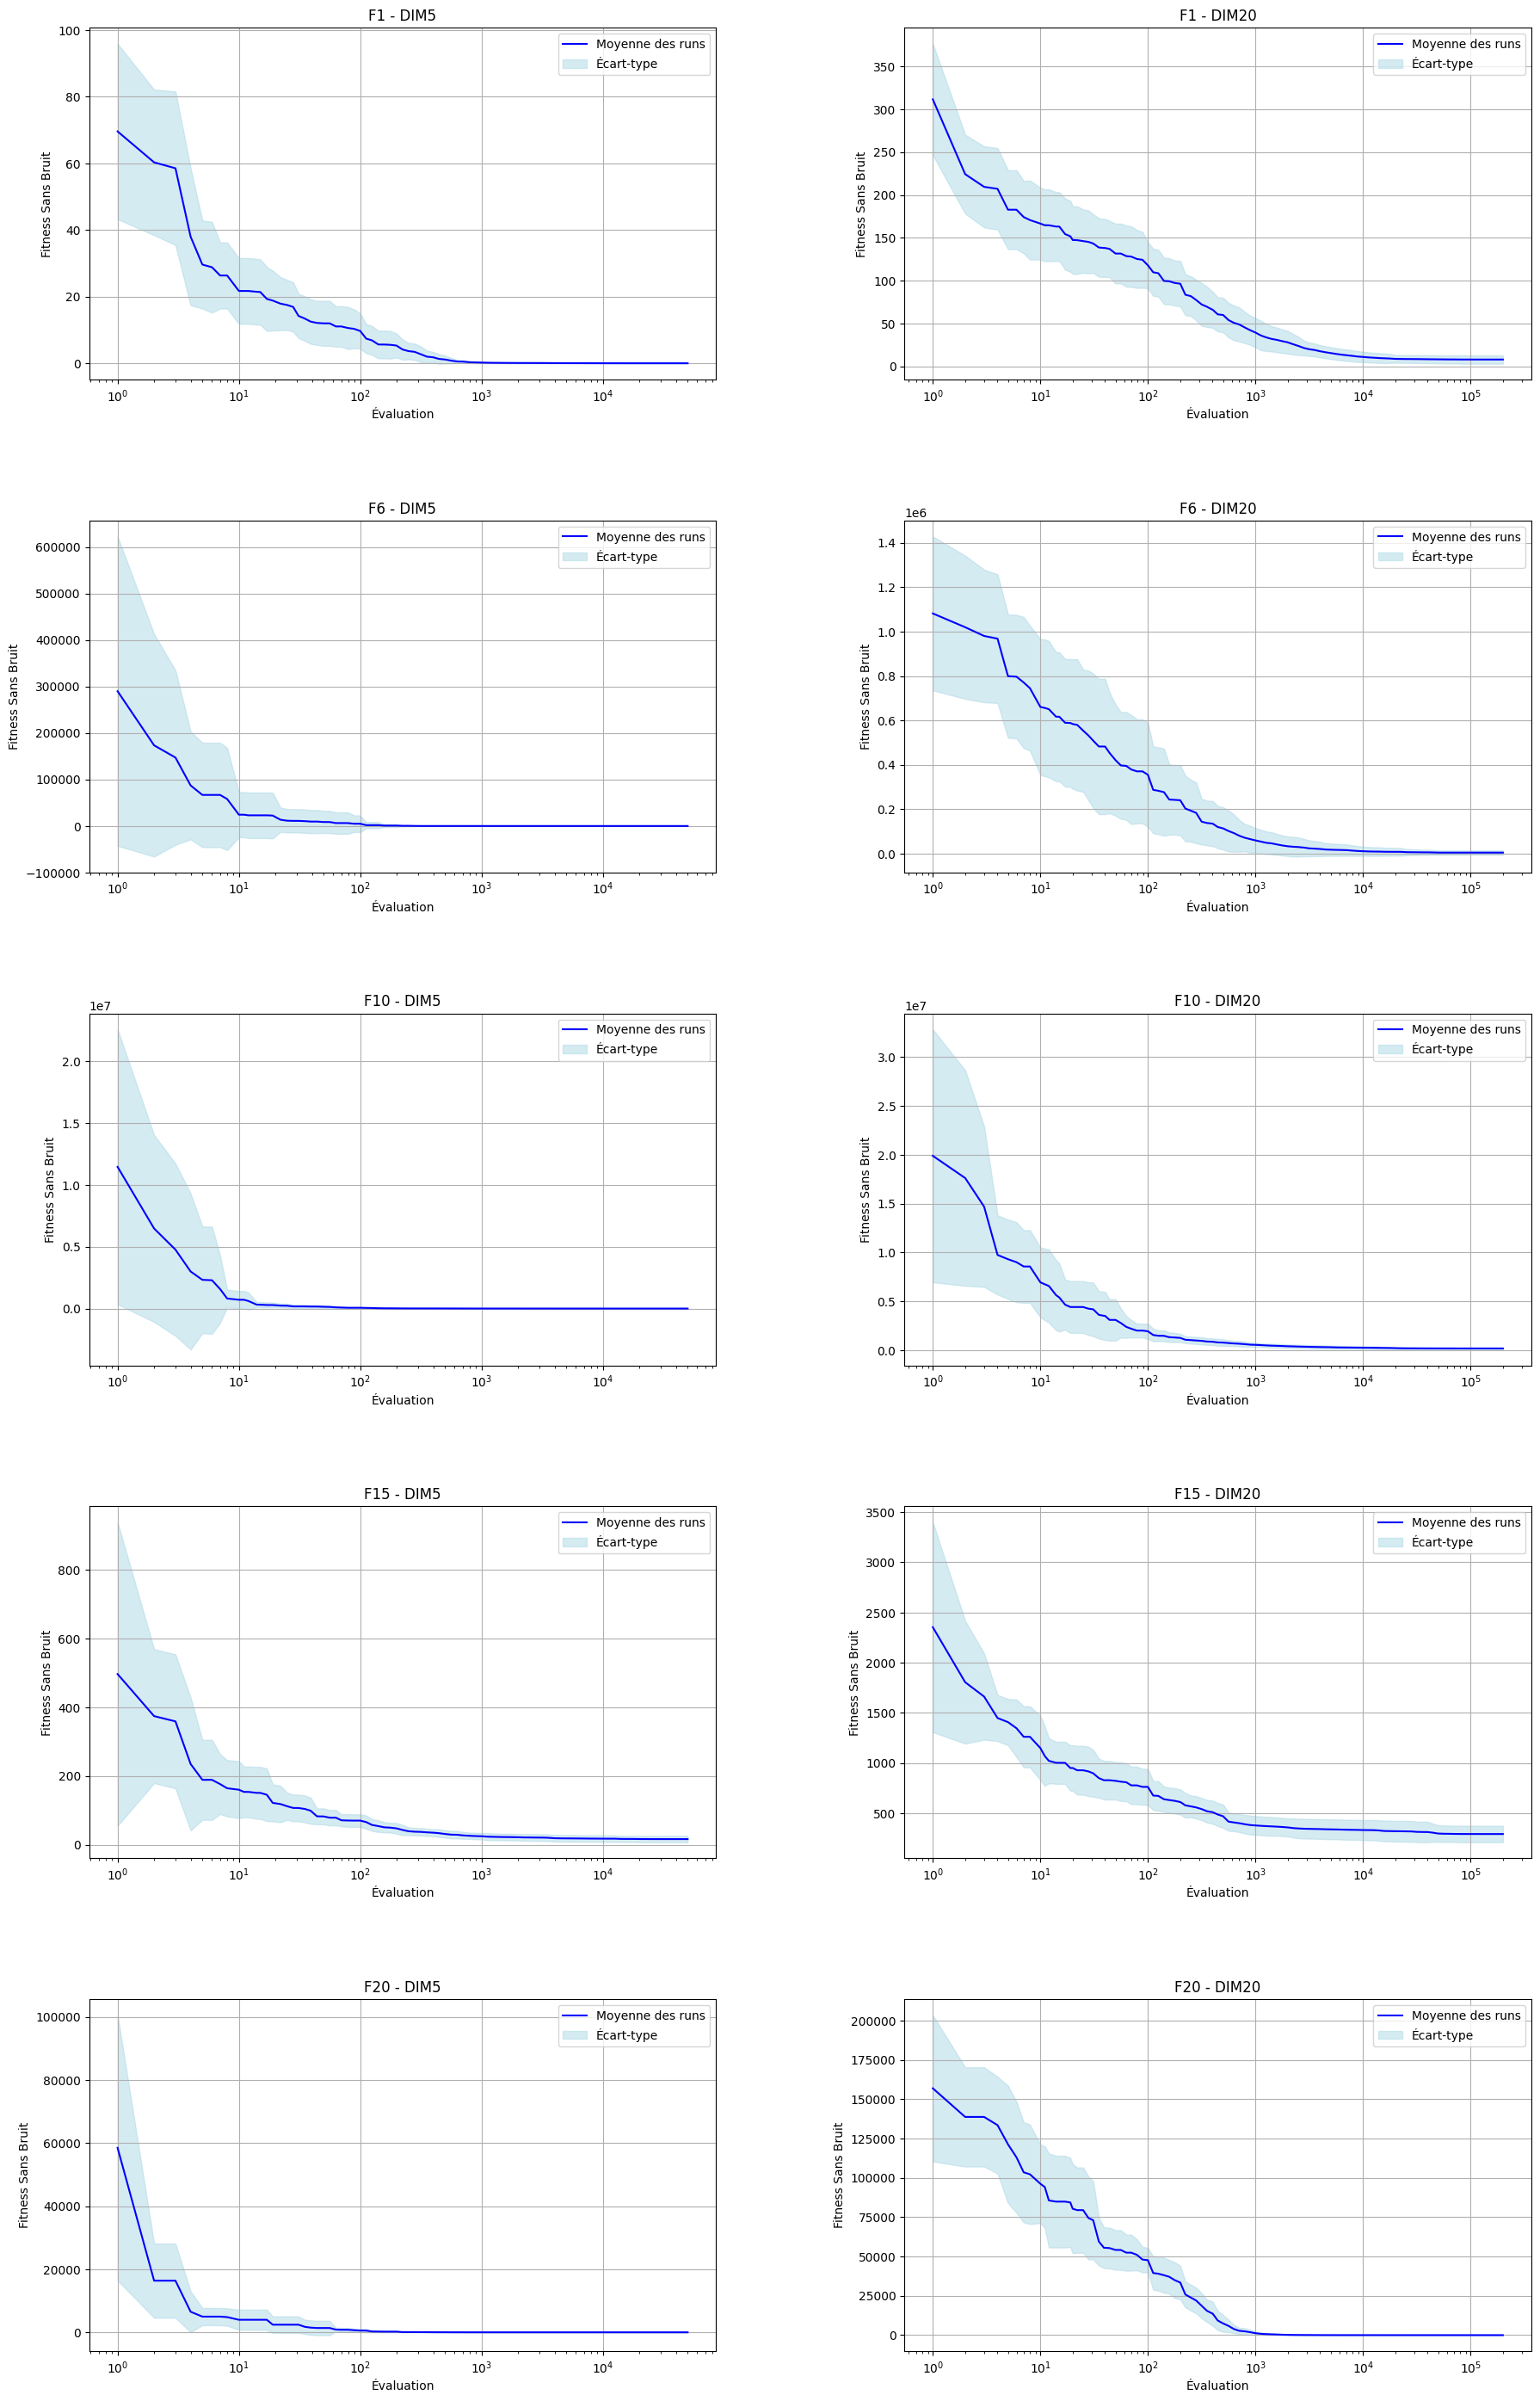

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def lire_donnees(fichier):
    with open(fichier, 'r') as f:
        lignes = f.readlines()
    
    donnees = []
    en_cours = False
    colonnes = ['evaluation', 'fitness_sans_bruit', 'fitness_sans_bruit_meilleure']
    
    for ligne in lignes:
        ligne = ligne.strip()
        if ligne.startswith('%'):
            if en_cours:
                df = pd.DataFrame(donnees, columns=colonnes)
                yield df
                donnees = []
            en_cours = True
        elif en_cours and ligne:
            valeurs = ligne.split()
            valeurs = valeurs[:3]
            donnees.append(valeurs)
    
    if donnees:
        df = pd.DataFrame(donnees, columns=colonnes)
        yield df

# Fonctions et dimensions à tracer
fichiers = ['f1', 'f6', 'f10', 'f15', 'f20']
dimensions = [5, 20]

# Créer une figure assez grande pour tout afficher sans scroller
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 30))  # Taille adaptée
axes = axes.flatten()

for idx, data_name in enumerate(fichiers):
    for dim_idx, dim in enumerate(dimensions):
        chemin_fichier = f'C:/Users/admin/Downloads/WOA_Espinoza/WOA/data_{data_name}/bbobexp_{data_name}_DIM{dim}_i1.tdat'
        
        executions = list(lire_donnees(chemin_fichier))
        moyennes = None
        ecart_types = None

        for df_exec in executions:
            df_exec['evaluation'] = pd.to_numeric(df_exec['evaluation'])
            df_exec['fitness_sans_bruit_meilleure'] = pd.to_numeric(df_exec['fitness_sans_bruit_meilleure'])

            if moyennes is None:
                moyennes = df_exec[['evaluation', 'fitness_sans_bruit_meilleure']].copy()
                ecart_types = df_exec[['evaluation', 'fitness_sans_bruit_meilleure']].copy()
                moyennes['fitness_sans_bruit_meilleure'] = moyennes['fitness_sans_bruit_meilleure'].astype(float)
                ecart_types['fitness_sans_bruit_meilleure'] = ecart_types['fitness_sans_bruit_meilleure'].astype(float) ** 2
            else:
                moyennes['fitness_sans_bruit_meilleure'] += df_exec['fitness_sans_bruit_meilleure'].astype(float)
                ecart_types['fitness_sans_bruit_meilleure'] += df_exec['fitness_sans_bruit_meilleure'].astype(float) ** 2

        moyennes['fitness_sans_bruit_meilleure'] /= len(executions)
        ecart_types['fitness_sans_bruit_meilleure'] = np.sqrt(
            (ecart_types['fitness_sans_bruit_meilleure'] / len(executions)) - (moyennes['fitness_sans_bruit_meilleure'] ** 2)
        )

        ax_idx = idx * len(dimensions) + dim_idx

        axes[ax_idx].plot(moyennes['evaluation'], moyennes['fitness_sans_bruit_meilleure'], label='Moyenne des runs', color='blue')
        axes[ax_idx].fill_between(
            moyennes['evaluation'],
            moyennes['fitness_sans_bruit_meilleure'] - ecart_types['fitness_sans_bruit_meilleure'],
            moyennes['fitness_sans_bruit_meilleure'] + ecart_types['fitness_sans_bruit_meilleure'],
            color='lightblue', alpha=0.5, label='Écart-type'
        )
        axes[ax_idx].set_xlabel('Évaluation')
        axes[ax_idx].set_ylabel('Fitness Sans Bruit')
        axes[ax_idx].set_title(f'{data_name.upper()} - DIM{dim}')
        axes[ax_idx].grid(True)
        axes[ax_idx].legend()
        axes[ax_idx].set_xscale('log')

plt.tight_layout()

# Pour afficher tout sans scroll (notamment en notebook)
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4, wspace=0.3)

plt.show()


# Comparaison des Algorithmes d'Optimisation

Ce script compare trois algorithmes d'optimisation (RANDOMSEARCH, WOA, JADE) sur plusieurs fonctions d'optimisation et dimensions. Il charge les résultats des différents algorithmes à partir de fichiers de données, calcule les moyennes des évaluations de performance (`fitness_sans_bruit_meilleure`) pour chaque algorithme et les trace sur un graphique en utilisant Matplotlib.

**NB** : N'oubliez pas d'adapter le chemin du fichier (`fichier`) à votre environnement local pour charger correctement les données.
```python
# Chemins des fichiers pour chaque algorithme
chemins_algorithmes = {
    'RANDOMSEARCH': 'C:/Users/admin/Downloads/RANDOMSEARCH-5-1e7D_Brockhoff/RANDOMSEARCH-5-1e7D-Brockhoff/data_{data_name}/bbobexp_{data_name}_DIM{dim}_i1.tdat',
    'WOA': 'C:/Users/admin/Downloads/WOA_Espinoza/WOA/data_{data_name}/bbobexp_{data_name}_DIM{dim}_i1.tdat',
    'JADE': 'C:/Users/admin/Downloads/JADE_posik_noiseless/JADE/data_{data_name}/bbobexp_{data_name}_DIM{dim}.tdat'
}
```

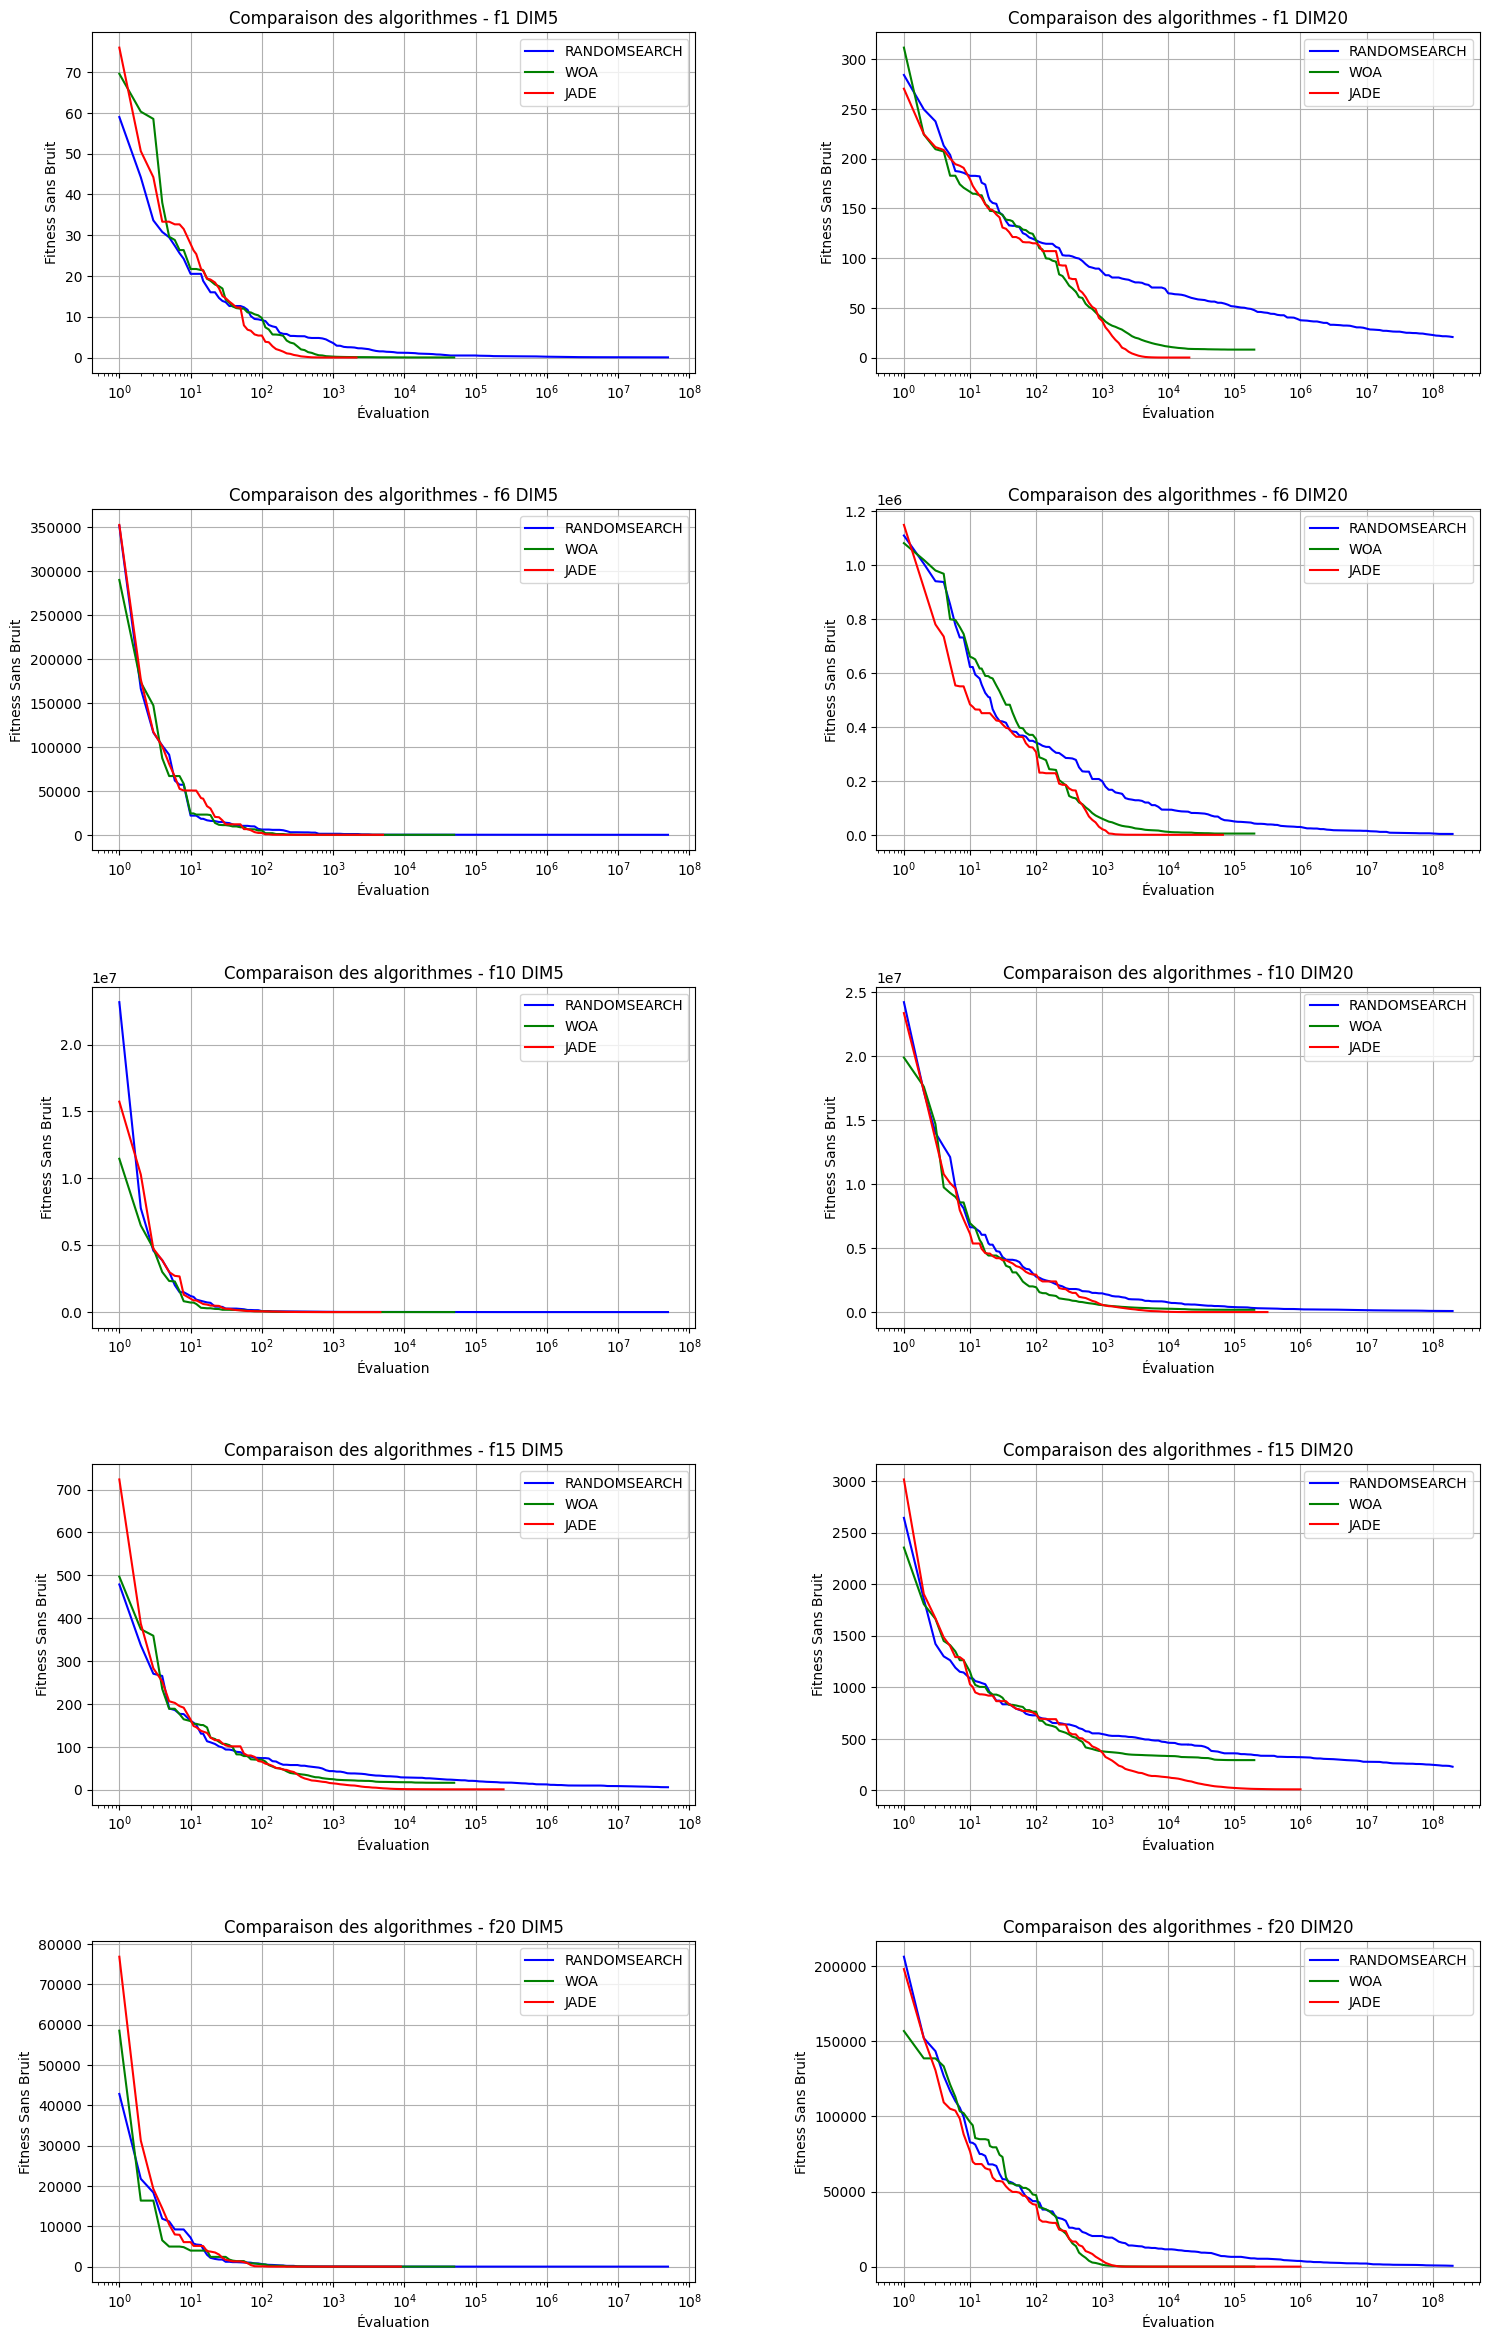

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour lire les données d'un fichier
def lire_donnees(fichier):
    with open(fichier, 'r') as f:
        lignes = f.readlines()
    donnees = []
    en_cours = False
    colonnes = ['evaluation', 'fitness_sans_bruit', 'fitness_sans_bruit_meilleure']  # Sélectionner seulement 3 colonnes
    for ligne in lignes:
        ligne = ligne.strip()
        # Si une ligne commence par '%', cela signifie que c'est le début d'un nouveau bloc
        if ligne.startswith('%'):
            if en_cours:
                df = pd.DataFrame(donnees, columns=colonnes)
                yield df
                donnees = []  
            en_cours = True
        elif en_cours and ligne:
            # Séparer les valeurs de la ligne
            valeurs = ligne.split()
            valeurs = valeurs[:3]
            donnees.append(valeurs)
    if donnees:
        df = pd.DataFrame(donnees, columns=colonnes)
        yield df

# Liste des fonctions et dimensions
fichiers = ['f1', 'f6', 'f10', 'f15', 'f20']
dimensions = [5, 20]

# Chemins des fichiers pour chaque algorithme
chemins_algorithmes = {
    'RANDOMSEARCH': 'C:/Users/admin/Downloads/RANDOMSEARCH-5-1e7D_Brockhoff/RANDOMSEARCH-5-1e7D-Brockhoff/data_{data_name}/bbobexp_{data_name}_DIM{dim}_i1.tdat',
    'WOA': 'C:/Users/admin/Downloads/WOA_Espinoza/WOA/data_{data_name}/bbobexp_{data_name}_DIM{dim}_i1.tdat',
    'JADE': 'C:/Users/admin/Downloads/JADE_posik_noiseless/JADE/data_{data_name}/bbobexp_{data_name}_DIM{dim}.tdat'
}

# Configuration des sous-graphes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))
axes = axes.flatten()

# Boucle principale pour chaque fonction et dimension
for idx, data_name in enumerate(fichiers):
    for dim_idx, dim in enumerate(dimensions):
        ax_idx = idx * len(dimensions) + dim_idx  # Index de l'axe
        
        # Initialiser un dictionnaire pour stocker les moyennes de chaque algorithme
        stats_algorithmes = {}
        
        # Lire les données pour chaque algorithme
        for algo, chemin_base in chemins_algorithmes.items():
            chemin_fichier = chemin_base.format(data_name=data_name, dim=dim)
            executions = list(lire_donnees(chemin_fichier))
            
            moyennes = None
            
            # Calculer la moyenne des runs
            for exec_num, df_exec in enumerate(executions):
                df_exec['evaluation'] = pd.to_numeric(df_exec['evaluation'])
                df_exec['fitness_sans_bruit_meilleure'] = pd.to_numeric(df_exec['fitness_sans_bruit_meilleure'])
                
                if moyennes is None:
                    moyennes = df_exec[['evaluation', 'fitness_sans_bruit_meilleure']].copy()
                    moyennes['fitness_sans_bruit_meilleure'] = moyennes['fitness_sans_bruit_meilleure'].astype(float)
                else:
                    moyennes['fitness_sans_bruit_meilleure'] += df_exec['fitness_sans_bruit_meilleure'].astype(float)
            
            moyennes['fitness_sans_bruit_meilleure'] /= len(executions)
            
            # Stocker les résultats pour cet algorithme
            stats_algorithmes[algo] = moyennes
        
        # Tracer les courbes pour chaque algorithme
        for algo, couleur in zip(stats_algorithmes.keys(), ['blue', 'green', 'red']):
            moyennes = stats_algorithmes[algo]
            
            axes[ax_idx].plot(
                moyennes['evaluation'], 
                moyennes['fitness_sans_bruit_meilleure'], 
                label=f'{algo}', 
                color=couleur
            )
        
        # Configurer le graphique
        axes[ax_idx].set_xlabel('Évaluation')
        axes[ax_idx].set_ylabel('Fitness Sans Bruit')
        axes[ax_idx].set_title(f'Comparaison des algorithmes - {data_name} DIM{dim}')
        axes[ax_idx].grid(True)
        axes[ax_idx].legend()
        axes[ax_idx].set_xscale('log')

plt.tight_layout()

# Pour afficher tout sans scroll (notamment en notebook)
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4, wspace=0.3)

plt.show()